In [1]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import cv2


In [2]:
def show_images(images, size=(16, 8), mode='rgb', title=(None,None)): 
    if not isinstance(images, tuple) and not isinstance(images, list):
        images = [images]
        title = [title]
        
    if isinstance(mode, tuple) or isinstance(mode, list):
        change_mode = True
        
    else:
        current_mode = mode
        change_mode = False
            
    rows = math.ceil(len(images) / 2)
    fig=plt.figure(figsize=size, dpi=150)
    for i, img in enumerate(images):
        fig.add_subplot(rows, 2, i+1)
        
        if change_mode:
            current_mode = mode[i]

        if current_mode=='grayscale':
            plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        else:
            plt.imshow(img)
            
        plt.title(title[i])
        plt.axis('off')

    plt.show()

In [3]:
def rgb_to_grayscale(np_img):
    return np_img[:,:,:3].dot([0.3, 0.59, 0.11]).astype('int')

In [4]:
def plot_hist(np_img, threshold=None, size=(16, 8), color='black', title=None, show=True, yscale_type='linear'):
    histogram, bin_edges = np.histogram(
            np_img, bins=256, range=(0, 256)
    )
    
    fig=plt.figure(figsize=size, dpi=150)

    plt.bar(bin_edges[0:-1], histogram, width=1.0, color=color) 
    if not isinstance(threshold, tuple) and not isinstance(threshold, list):
        threshold = (threshold)
    
    for t in threshold:   
        plt.axvline(t, 0, 1, color='red')

    plt.xlabel('brightness')
    plt.ylabel('number of pixels')

    plt.grid(True)
    plt.yscale(yscale_type)
    
    if title:
        plt.title(title)
    if show:
        plt.show()

# Загрузка изображения и преобразование цветного к полутоновому

In [5]:
img_pil = Image.open(input("Enter original image path: "))
img_np = np.asarray(img_pil)

Enter original image path: 2.png


In [6]:
# To grayscale
img_np_grayscale = rgb_to_grayscale(img_np)

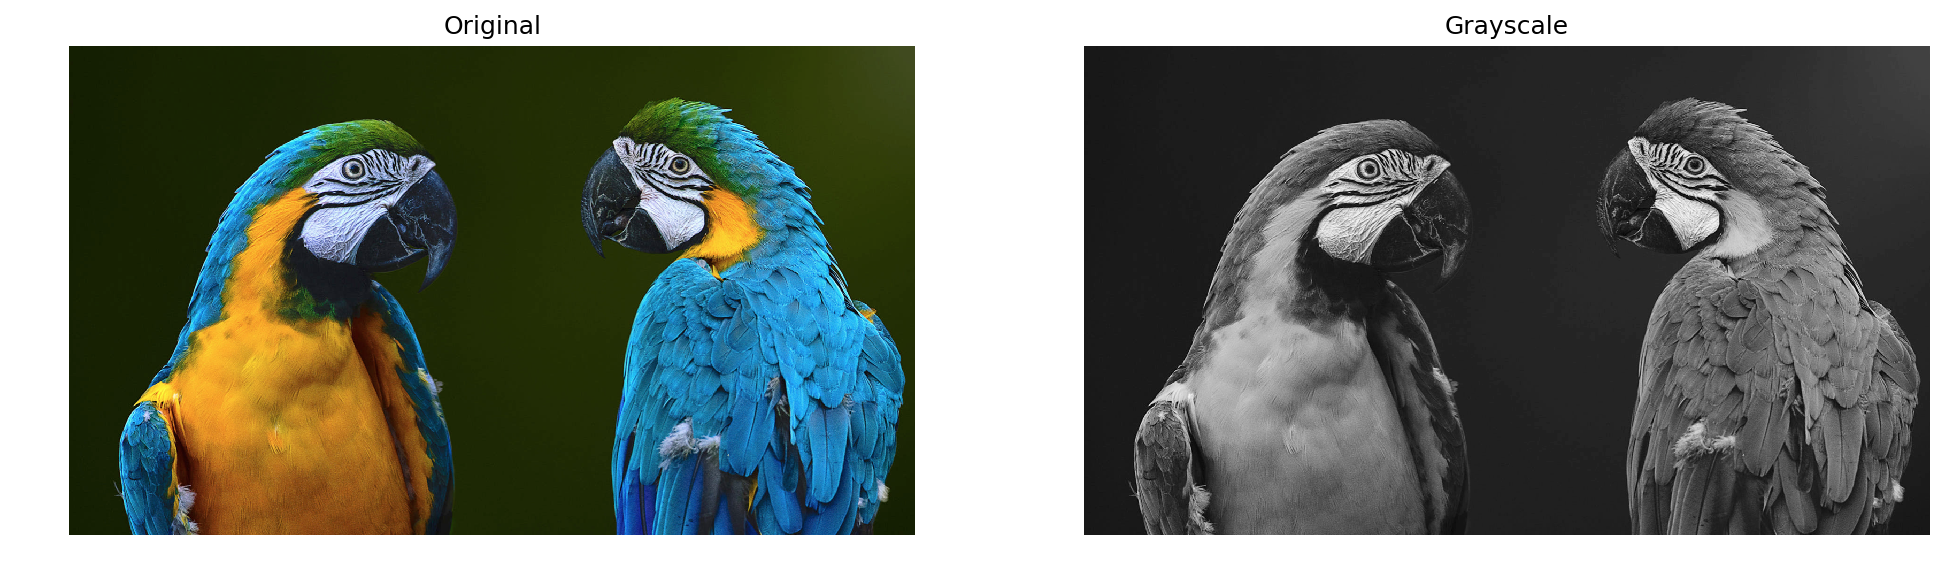

In [7]:
show_images((img_np, img_np_grayscale), 
            mode=('rgb', 'grayscale'), 
            title=('Original', 'Grayscale'))

# Квантование по яркости (с ручным заданием количества уровней)

In [8]:
def quantization_uniform(np_img, levels, trace=False):
    if trace: print('\n', str(levels), ' levels')
    temp = np.copy(np_img).astype('int')
    q = round(256 / levels) - 1
    for i in range(levels):
        mean_val = round(((i*q+i) + ((i+1)*q+i)) / 2)        
        temp[(temp>=(i*q+i)) & (temp<=((i+1)*q+i))] = mean_val
        
        if trace: 
            print(f'[{i*q+i}:{(i+1)*q+i}] -> {mean_val}')
    return temp


def quantization_uniform_rgb(np_img, levels, trace=False):
    temp = np.zeros(np_img.shape)
    if img_np.shape[2] == 4:
        temp[:,:,3] = np_img[:,:,3]
    for i in range(3):
        temp[:,:,i] = quantization_uniform(np_img[:,:,i], levels, trace)
    return temp.astype('int')


def quantization(np_img, levels, mode='grayscale', trace=False):
    images = []
    for level in levels:
        if mode == 'grayscale':
            images.append(quantization_uniform(np_img, level, trace))
        elif mode == 'rgb':
            images.append(quantization_uniform_rgb(np_img, level, trace))
        else: 
            images = None
    return images

## Grayscale image

In [9]:
quant_levels = [4, 8, 16, 32, 64]
quant_imgages = quantization(img_np_grayscale, quant_levels, trace=True)

# Append original image to beginning of list
quant_imgages.insert(0,img_np_grayscale)

# Create labels
quant_labels = ['Original grayscale']
for level in quant_levels:
    quant_labels.append(str(level) + ' levels')


 4  levels
[0:63] -> 32
[64:127] -> 96
[128:191] -> 160
[192:255] -> 224

 8  levels
[0:31] -> 16
[32:63] -> 48
[64:95] -> 80
[96:127] -> 112
[128:159] -> 144
[160:191] -> 176
[192:223] -> 208
[224:255] -> 240

 16  levels
[0:15] -> 8
[16:31] -> 24
[32:47] -> 40
[48:63] -> 56
[64:79] -> 72
[80:95] -> 88
[96:111] -> 104
[112:127] -> 120
[128:143] -> 136
[144:159] -> 152
[160:175] -> 168
[176:191] -> 184
[192:207] -> 200
[208:223] -> 216
[224:239] -> 232
[240:255] -> 248

 32  levels
[0:7] -> 4
[8:15] -> 12
[16:23] -> 20
[24:31] -> 28
[32:39] -> 36
[40:47] -> 44
[48:55] -> 52
[56:63] -> 60
[64:71] -> 68
[72:79] -> 76
[80:87] -> 84
[88:95] -> 92
[96:103] -> 100
[104:111] -> 108
[112:119] -> 116
[120:127] -> 124
[128:135] -> 132
[136:143] -> 140
[144:151] -> 148
[152:159] -> 156
[160:167] -> 164
[168:175] -> 172
[176:183] -> 180
[184:191] -> 188
[192:199] -> 196
[200:207] -> 204
[208:215] -> 212
[216:223] -> 220
[224:231] -> 228
[232:239] -> 236
[240:247] -> 244
[248:255] -> 252

 64  lev

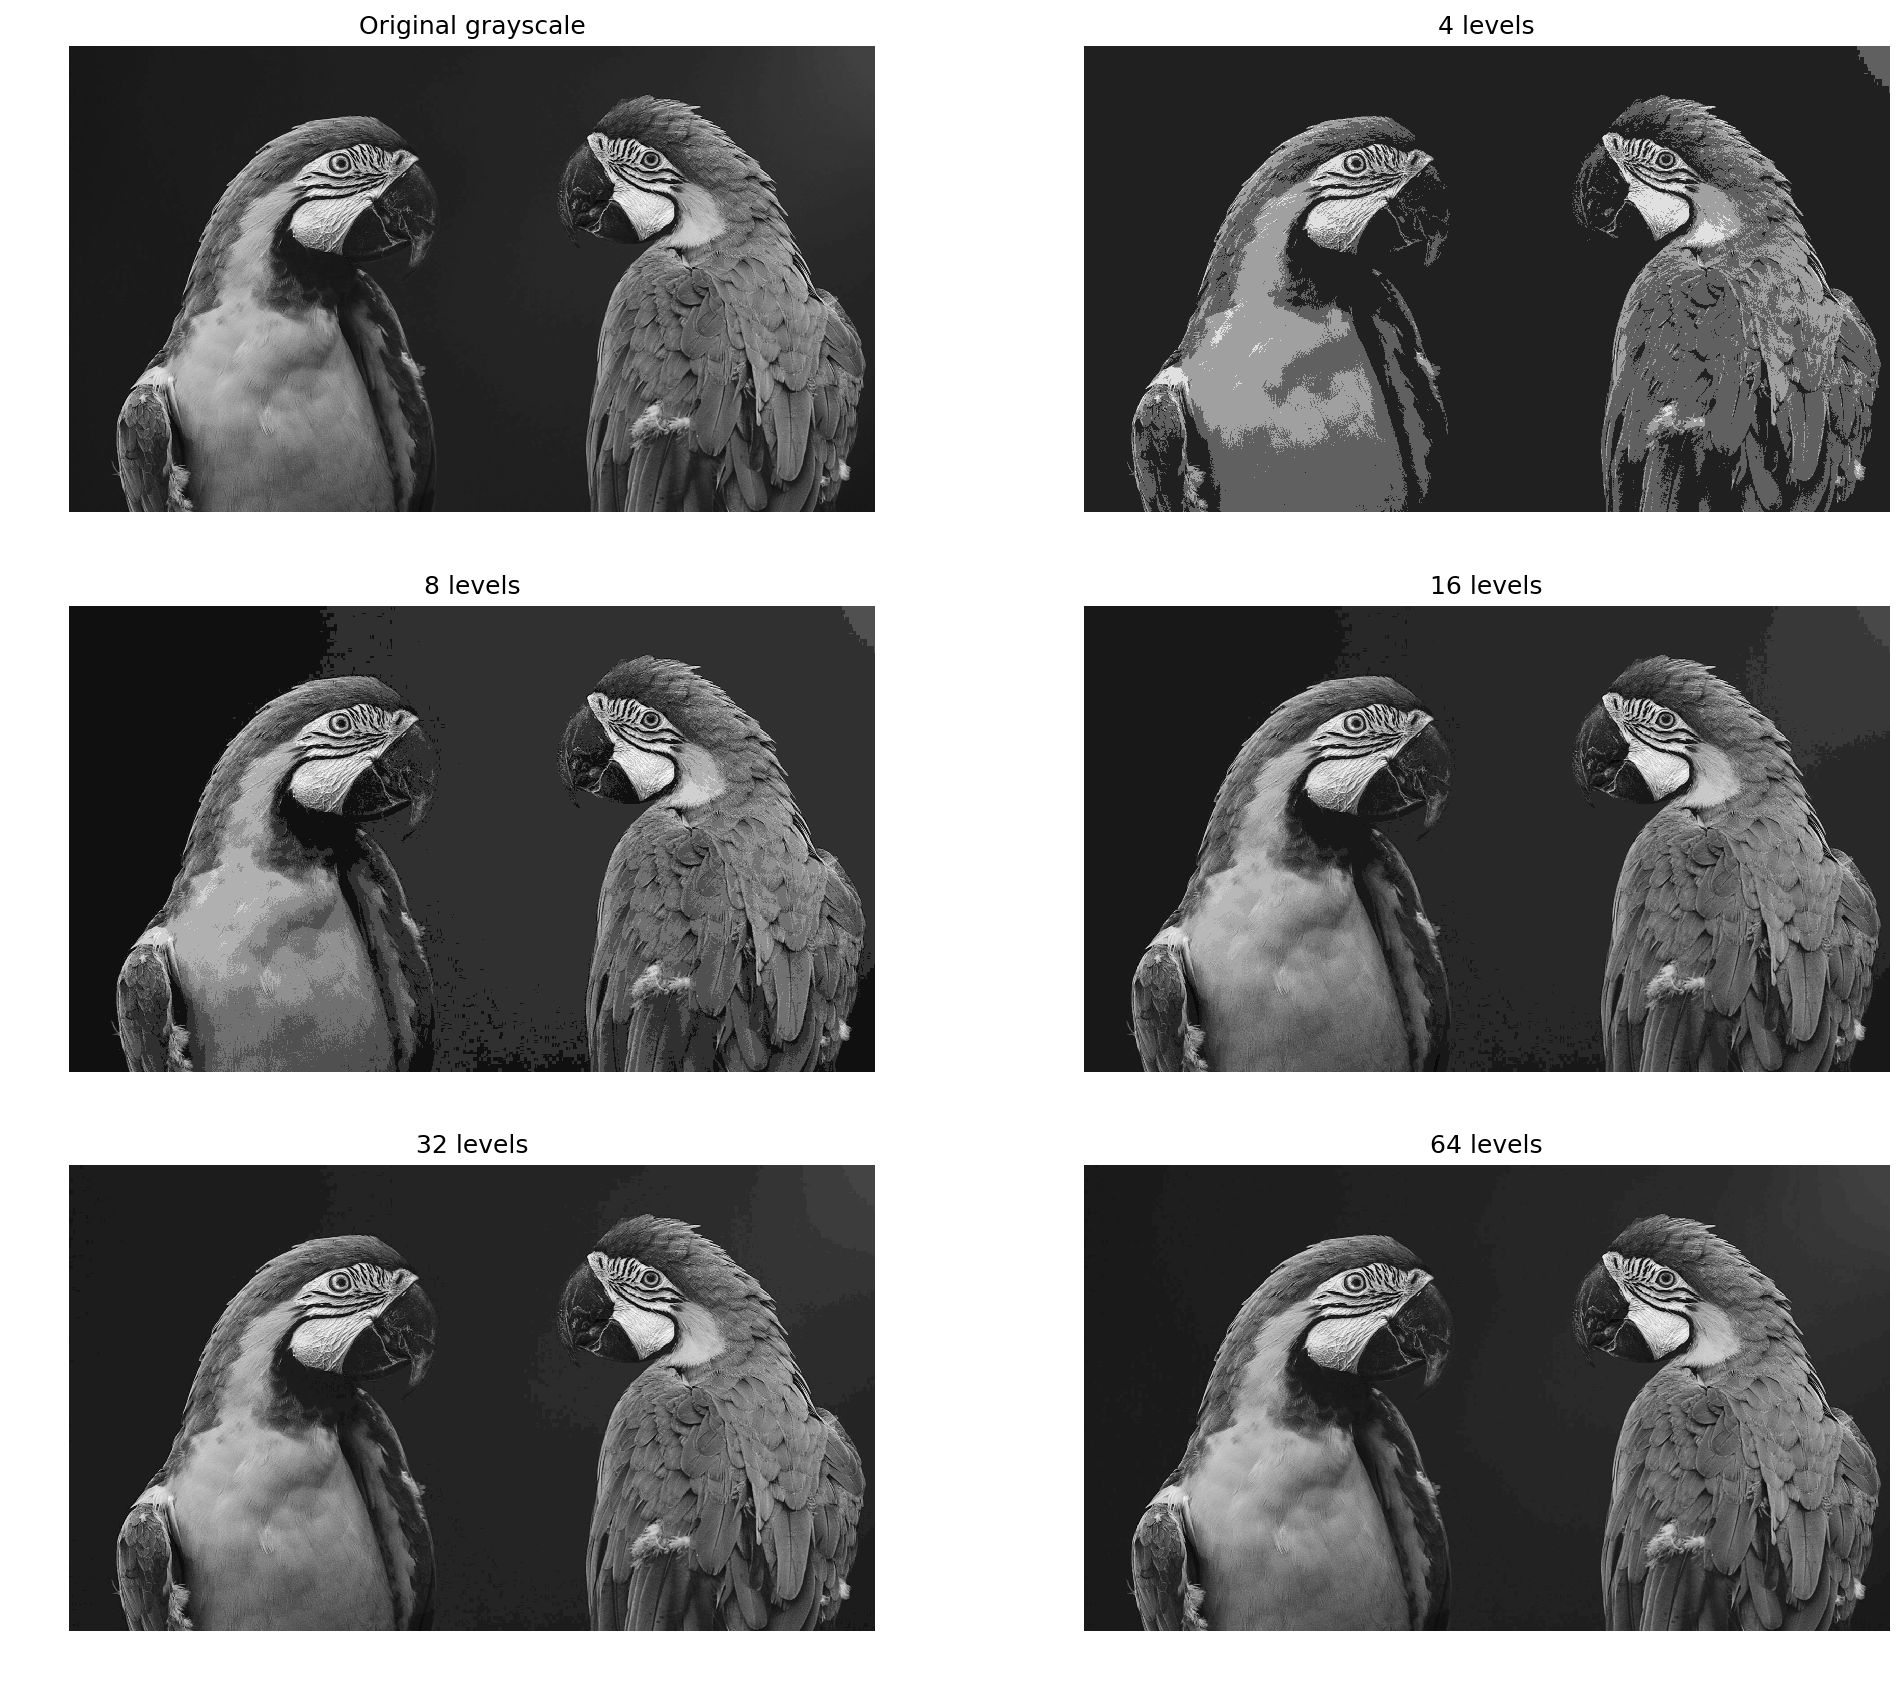

In [10]:
show_images(quant_imgages, size=(16, 14), mode='grayscale', title=quant_labels)

## RGB image

In [11]:
quant_levels = [4, 8, 16, 32, 64]
quant_imgages_rgb = quantization(img_np, quant_levels, mode='rgb')

# Append original image to beginning of list
quant_imgages_rgb.insert(0,img_np)

# Create labels
quant_labels = ['Original grayscale']
for level in quant_levels:
    quant_labels.append(str(level) + ' levels')

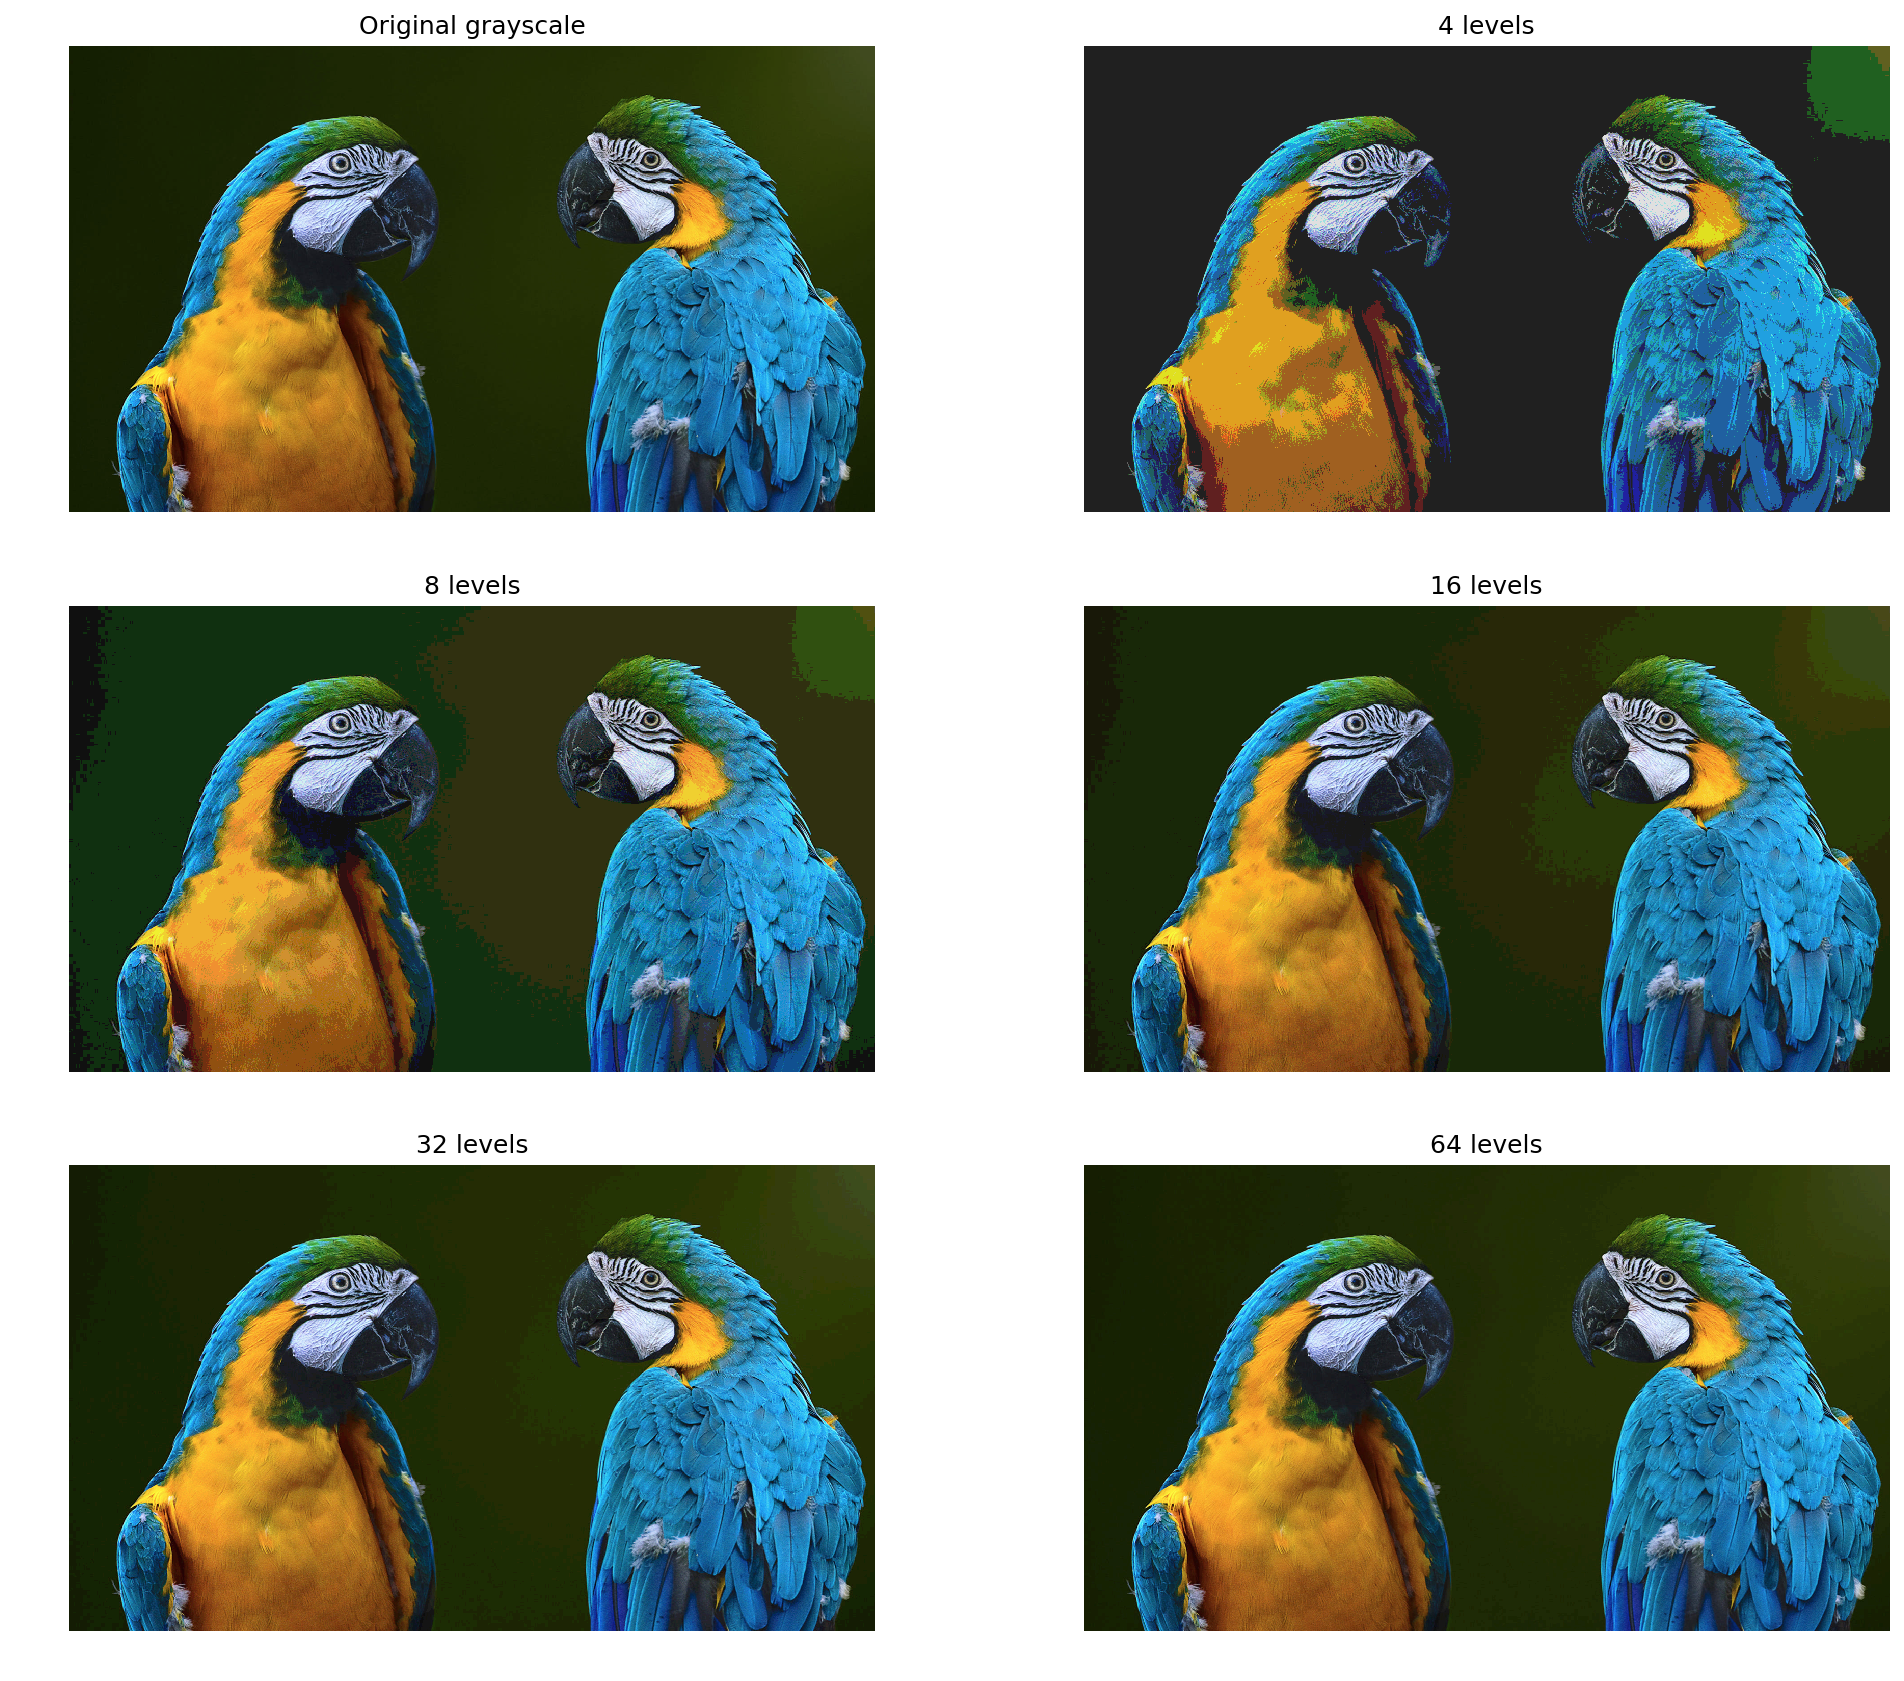

In [12]:
show_images(quant_imgages_rgb, size=(16, 14), title=quant_labels)

# Оцу

In [5]:
otsu_img = Image.open(input("Enter the image path: "))
otsu_img_np = np.asarray(otsu_img)
# To grayscale
otsu_img_np_grayscale = rgb_to_grayscale(otsu_img_np)
# otsu_img_np_grayscale = otsu_img_np

Enter the image path: coins.jpg


In [6]:
def otsu_hist(hist, pixels, start=0, end=256):
    intensity = 0
    for i in range(start, end):
        intensity += i * hist[i]
    
    max_sigma = 0
    threshold = 0
    
    first_class = 0
    fc_intensity = 0
    
    for i in range(start, end):
        first_class += hist[i]
        fc_intensity += i * hist[i]
        
        if first_class == 0 or first_class == pixels:
            continue
        
        fc_prob = first_class / pixels
        sc_prob = 1 - fc_prob
        
        second_class = pixels - first_class
        second_class_intensity = intensity - fc_intensity
        
        first_class_mean = fc_intensity / first_class
        second_class_mean = second_class_intensity / second_class
        
        delta = (second_class_mean - first_class_mean) ** 2
        sigma = fc_prob * sc_prob * delta
        
        if sigma > max_sigma:
            threshold = i
            max_sigma = sigma
        
    return threshold

def otsu_img(np_img, start=0, end=256):
    hist, _ = np.histogram(np_img, bins=256)
    pixels = np_img.shape[0] * np_img.shape[1]
    return otsu_hist(hist, pixels, start=0, end=256)

In [7]:
def otsu_color(np_img, threshold, colors=(0, 255)):
    print(threshold)
    temp = np.copy(np_img).astype('int')
    temp[temp<=threshold] = colors[0]
    temp[temp>threshold] = colors[1]
    return temp

## Глобальный

100


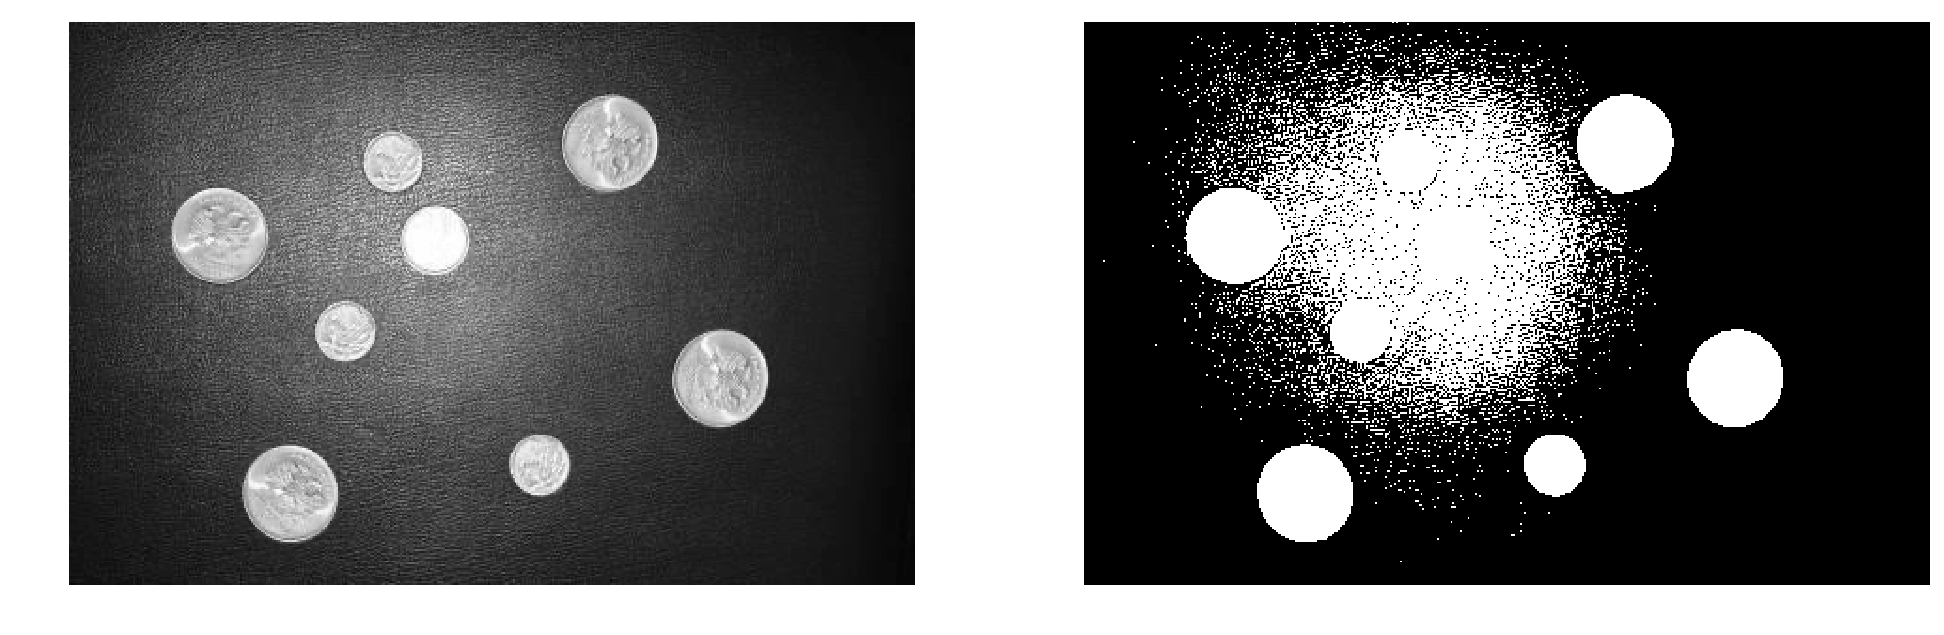

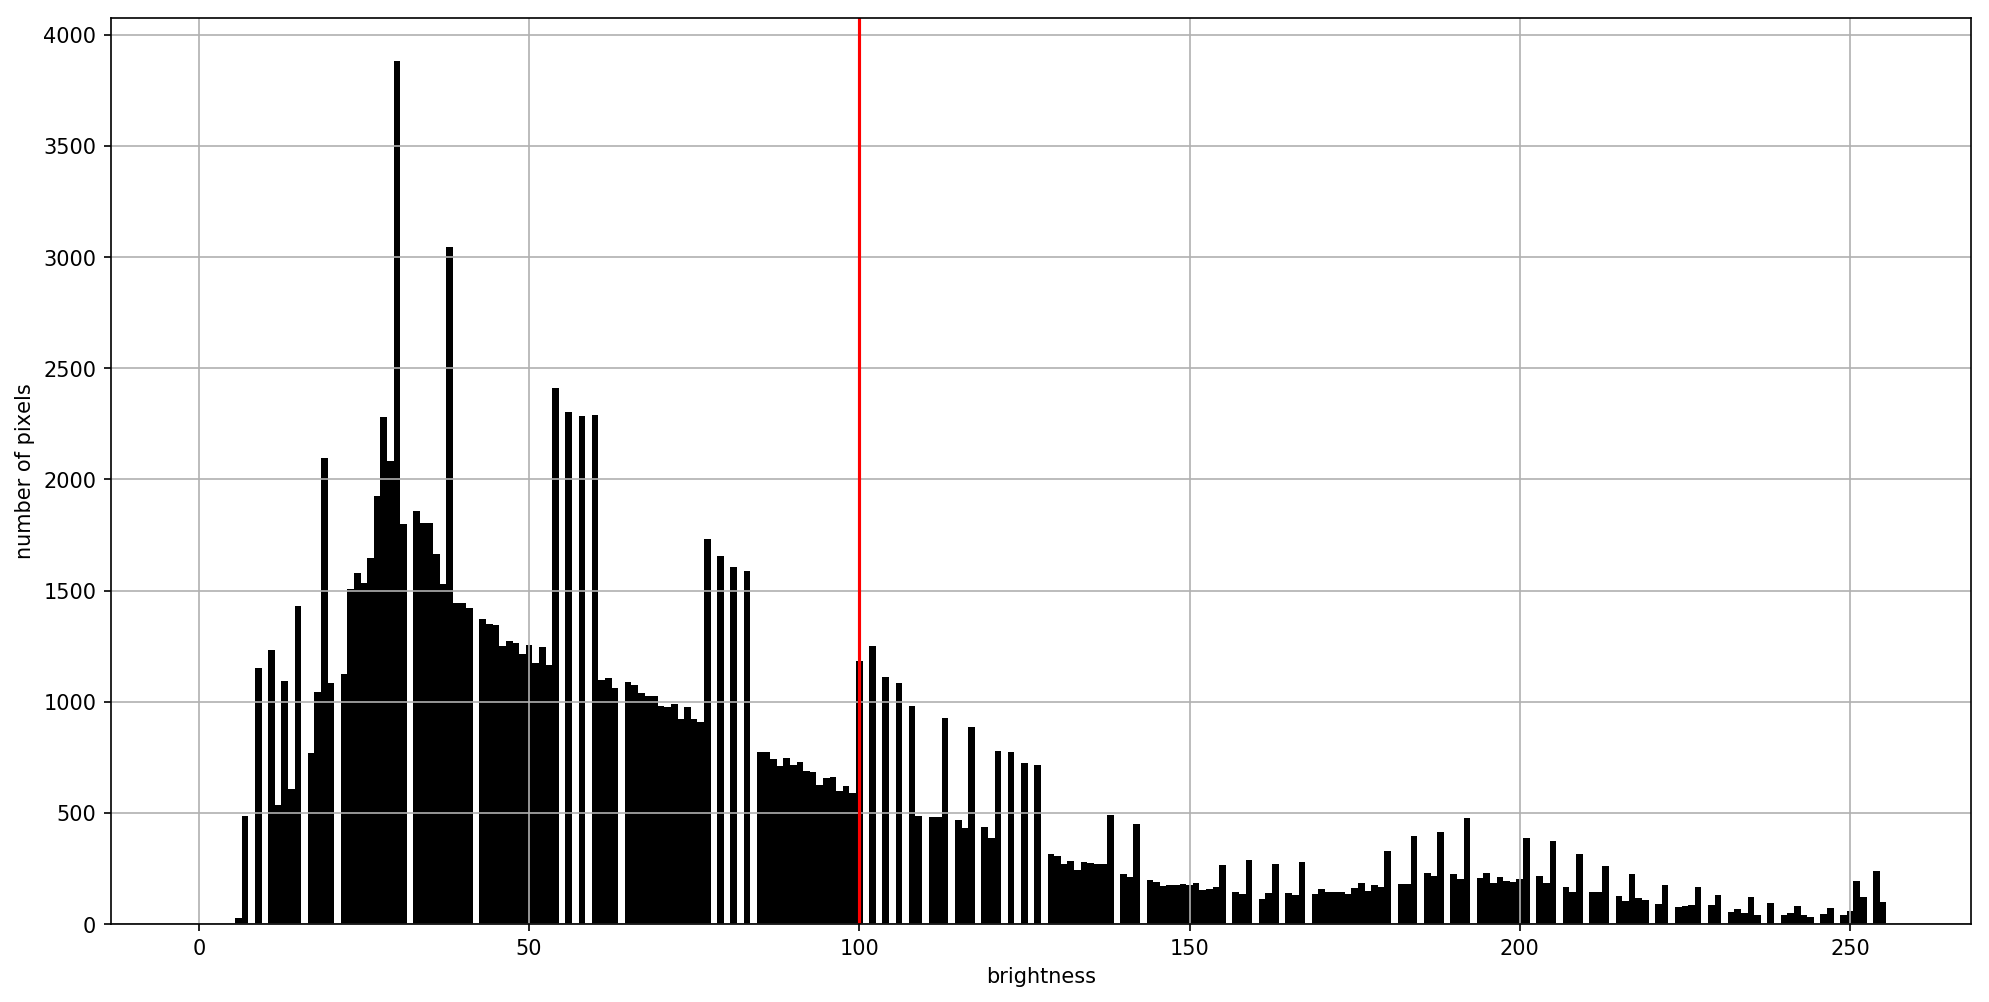

In [8]:
otsu_threshold = otsu_img(otsu_img_np_grayscale)
otsu_global_img = otsu_color(otsu_img_np_grayscale, otsu_threshold)
show_images((otsu_img_np_grayscale, otsu_global_img), 
            mode='grayscale')
plot_hist(otsu_img_np_grayscale, [otsu_threshold])

## Локальный

In [44]:
def split_image(np_img, axis=0):
    height, width = np_img.shape
    if axis == 0:
        # Cut the image in half
        height_cutoff = height // 2
        p1 = np_img[:height_cutoff, :]
        p2 = np_img[height_cutoff:, :]
    else:
        # Cut the image in half
        width_cutoff = width // 2
        p1 = np_img[:, :width_cutoff]
        p2 = np_img[:, width_cutoff:]
        
    return (p1, p2)

def merge_image(parts, ax=0):
    return np.concatenate(parts, axis=ax)

In [45]:
def local_otsu(np_img, axis=0, return_parts=False):
    parts = split_image(np_img, axis)
    thresholds = []
    for p in parts:
        threshold = otsu_img(p)
        thresholds.append(threshold)
        
    if return_parts: return thresholds, parts
    else: return thresholds

In [46]:
local_thresholds, local_parts = local_otsu(otsu_img_np_grayscale,
                                           return_parts=True)
local_thresholds

[157, 88]

157
88


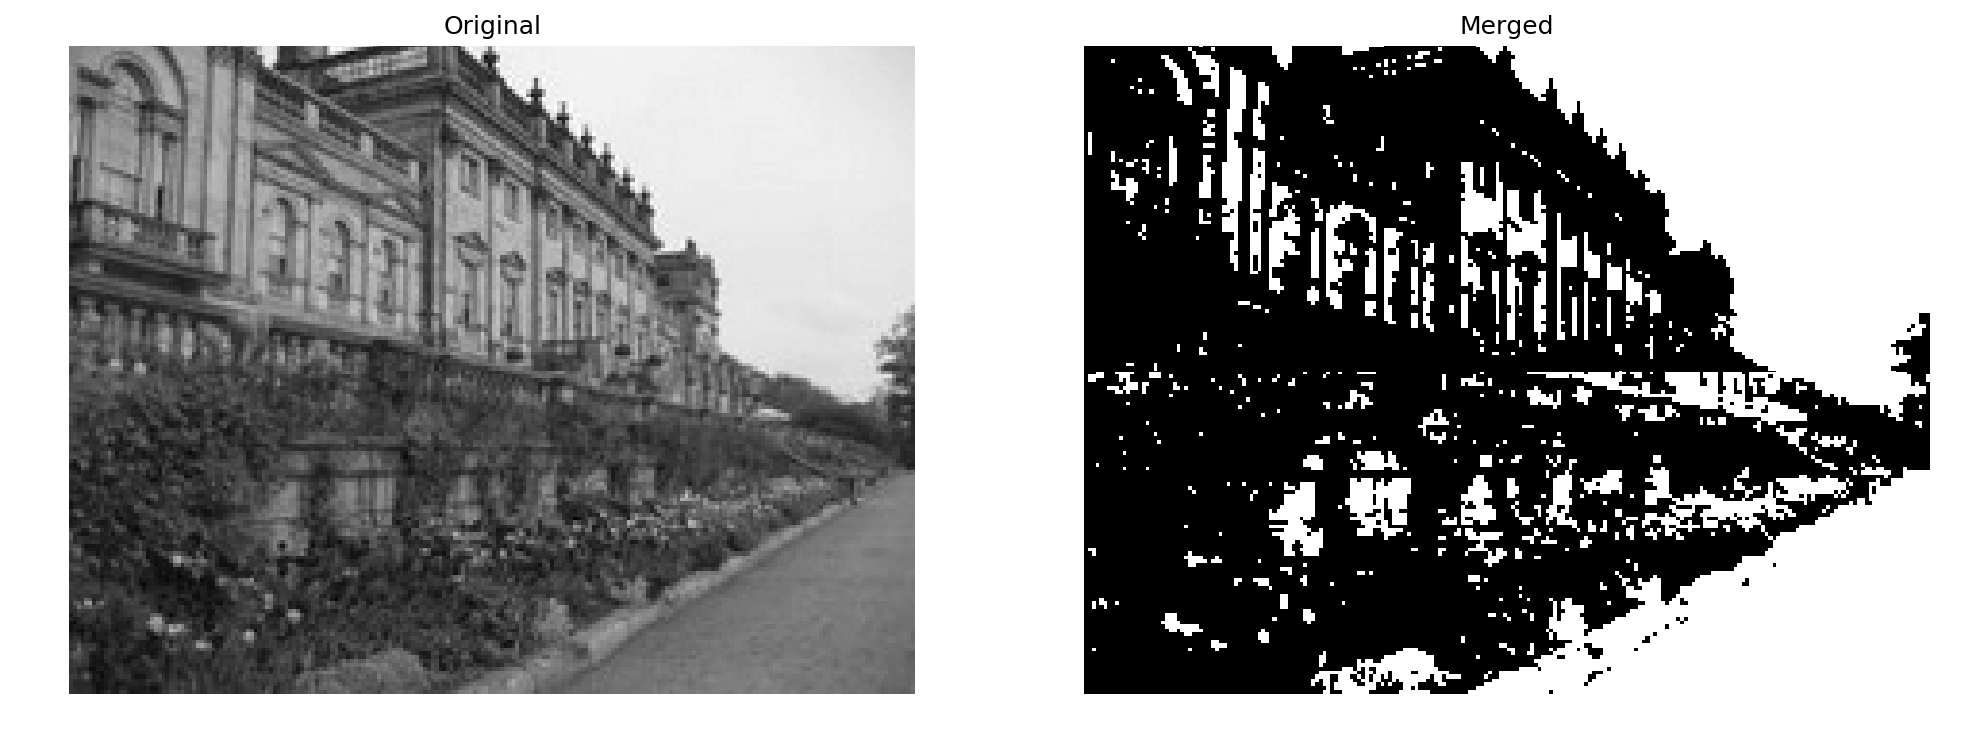

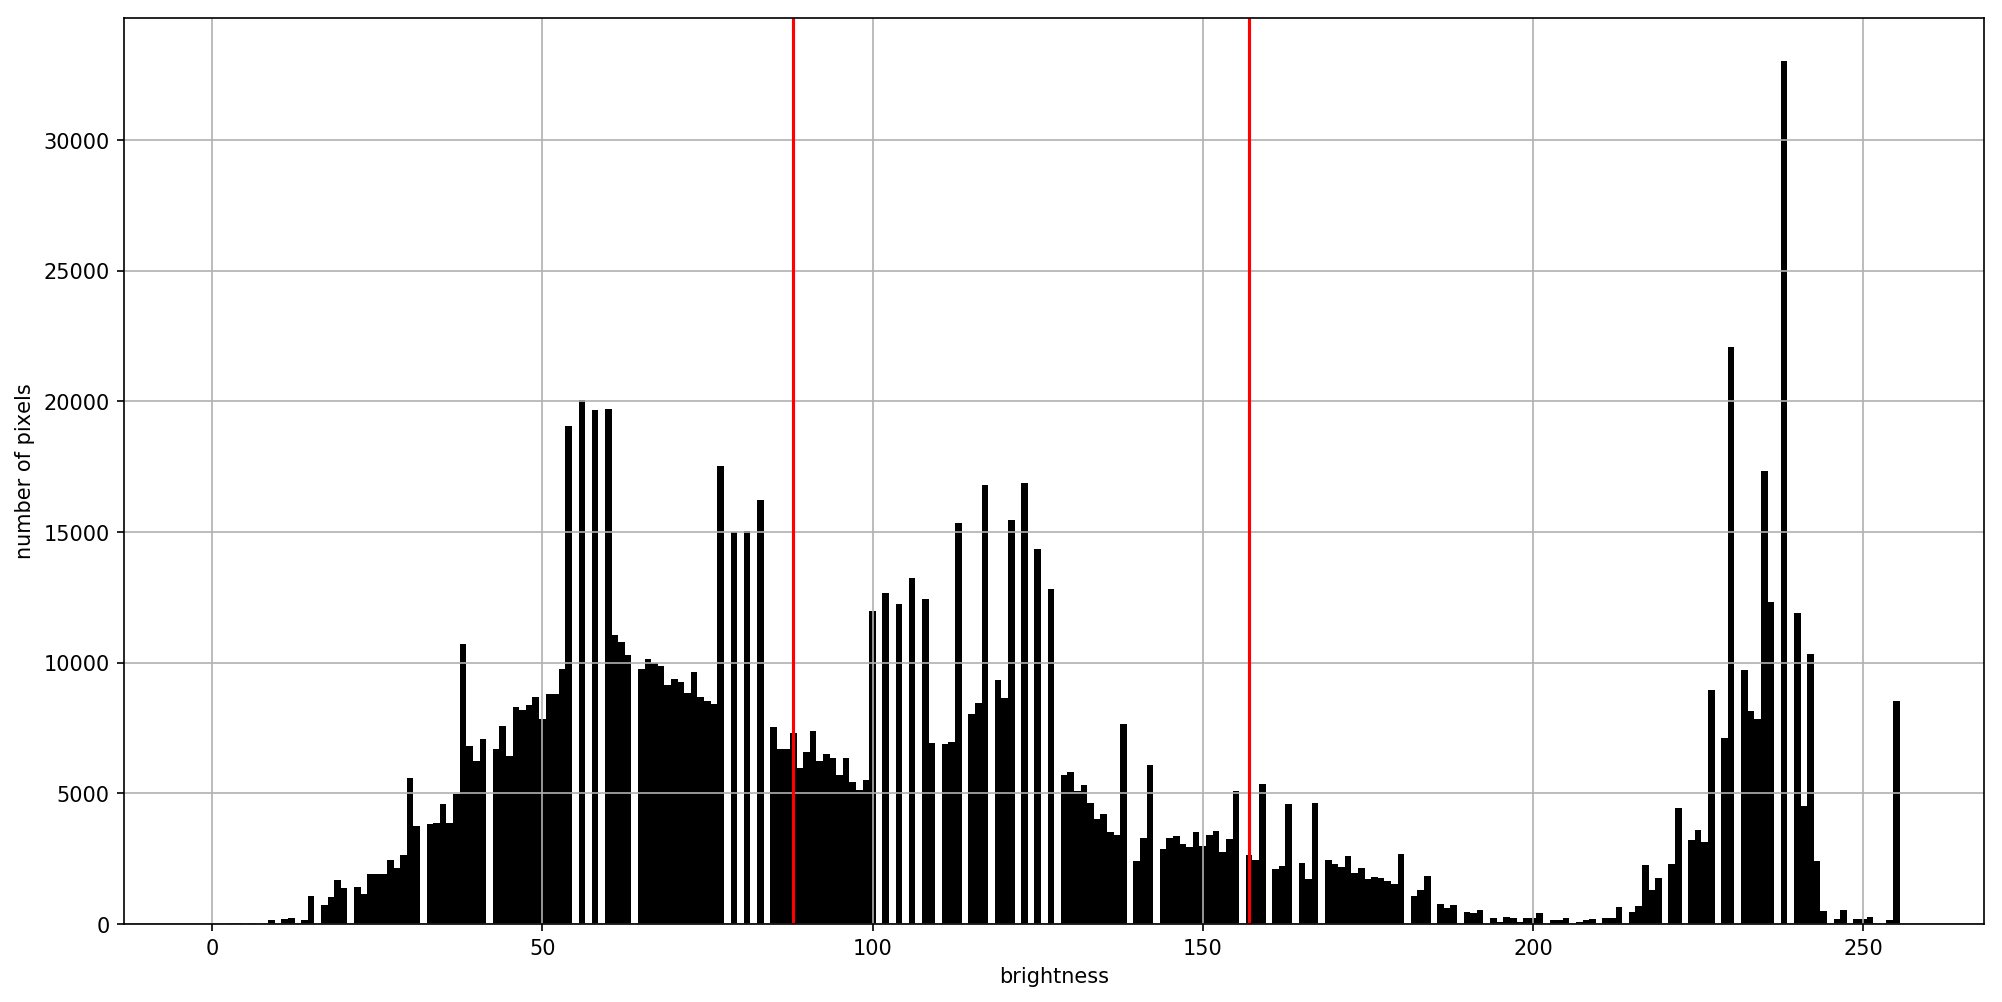

In [47]:
merged_img = merge_image(
    (otsu_color(local_parts[0], local_thresholds[0]),
     otsu_color(local_parts[1], local_thresholds[1]))
)

show_images((otsu_img_np_grayscale, merged_img), mode='grayscale', title=('Original', 'Merged'))
plot_hist(otsu_img_np_grayscale, local_thresholds)

## Рекурсивный

In [56]:
def recursive_otsu(hist, pixel_count, start=0, end=256):
    otsu = otsu_hist(hist, pixel_count, start, end)
    
    levels = [otsu]
    
    if (end - start) > 64: 
        levels += recursive_otsu(hist, pixel_count // 2, start=start, end=otsu)
        levels += recursive_otsu(hist, pixel_count // 2, start=otsu, end=end)
    
    return levels


def hierarchical_threshold(image):
    hist, _ = np.histogram(image, bins=256)
    pixels_count = len(image) * len(image[0])
    levels = sorted(set(recursive_otsu(hist, pixels_count)))
    
    colors = []
    previous_level = 0
    for level in levels:
        colors.append(previous_level + (level - previous_level) // 2)
        previous_level = level
    
    return levels, colors

In [57]:
def levels_quantorize(image, thresholds, colors):
    thresholds = [0] + thresholds
    lut = [255 for _ in range(256)]
    for i in range(len(thresholds) - 1):
        down = thresholds[i]
        up = thresholds[i + 1]
        for j in range(down, up):
            lut[j] = colors[i]
        
    image = np.vectorize(lambda x: lut[x])(image)
    return image

In [58]:
levels, colors = hierarchical_threshold(otsu_img_np_grayscale)
quanted_image = levels_quantorize(otsu_img_np_grayscale, levels, colors).astype('uint8')
print(f'Levels = {len(levels)}')

Levels = 10


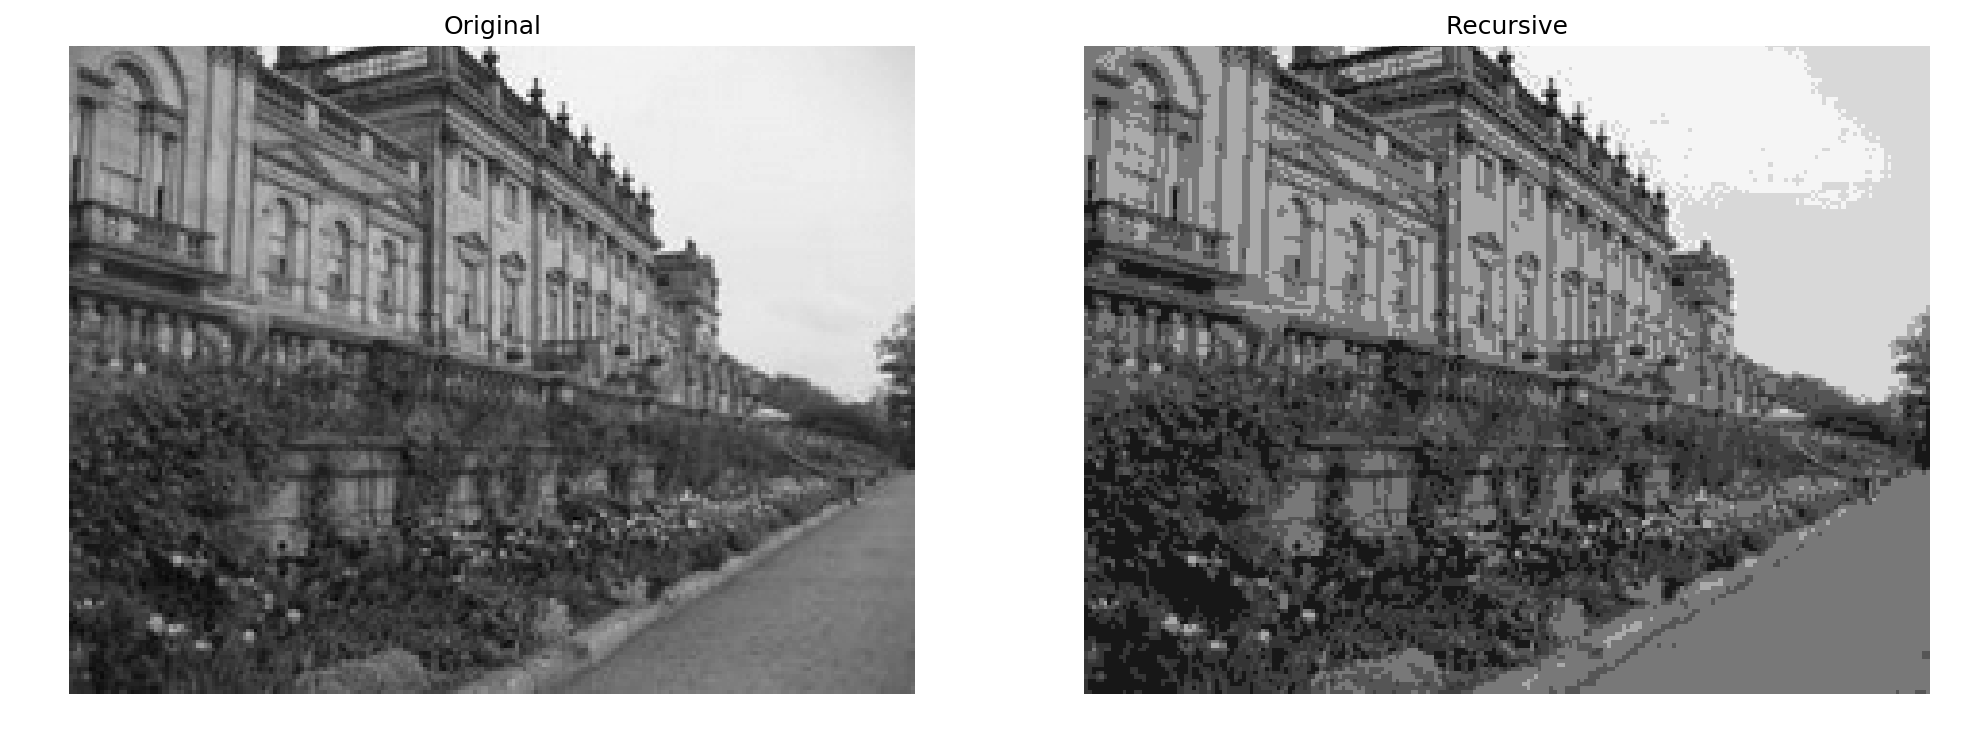

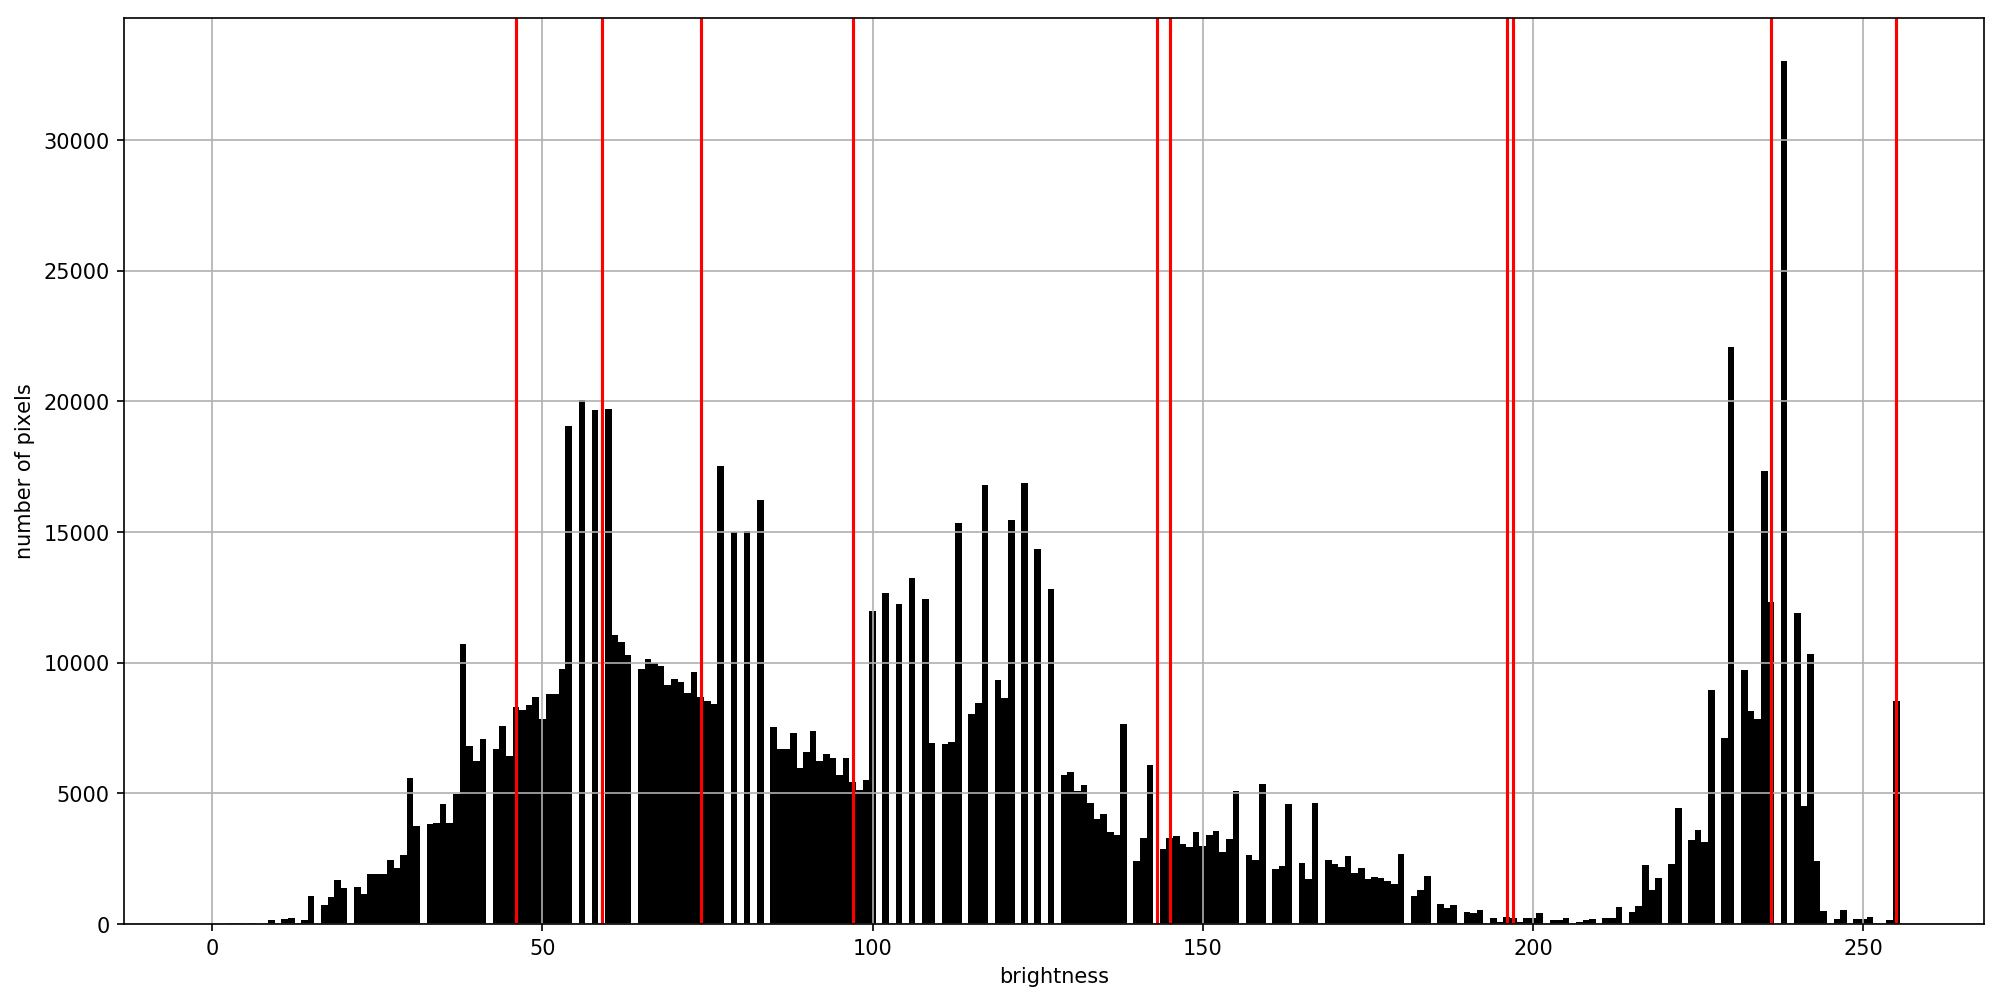

In [59]:
show_images((otsu_img_np_grayscale, quanted_image), mode='grayscale', title=('Original', 'Recursive'))
plot_hist(otsu_img_np_grayscale, levels)